In [ ]:
#Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img



In [ ]:
# Define image dimensions and file paths
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
train_dir = '/content/drive/MyDrive/ANN_Train_Data/CNN/train/train'
validation_dir = '/content/drive/MyDrive/ANN_Train_Data/CNN/train/validation'
test_dir = '/content/drive/MyDrive/ANN_Train_Data/CNN/train/test'
num_classes = 36
batch_size = 32



In [ ]:
# Prepare data augmentation configuration for training data
train_datagen = ImageDataGenerator(rescale=1./255)

# Prepare data augmentation configuration for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Generate training data from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Generate validation data from directory
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')



Found 3180 images belonging to 36 classes.
Found 363 images belonging to 36 classes.


In [ ]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [ ]:
# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size)



<ipython-input-12-3f492077dfde>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
99/99 [==============================] - 274s 3s/step - loss: 3.3521 - accuracy: 0.0791 - val_loss: 2.8194 - val_accuracy: 0.1818
Epoch 2/10
99/99 [==============================] - 254s 3s/step - loss: 2.6902 - accuracy: 0.2030 - val_loss: 2.3134 - val_accuracy: 0.2955
Epoch 3/10
99/99 [==============================] - 301s 3s/step - loss: 2.3150 - accuracy: 0.3072 - val_loss: 1.6481 - val_accuracy: 0.5114
Epoch 4/10
99/99 [==============================] - 311s 3s/step - loss: 2.0454 - accuracy: 0.3758 - val_loss: 1.4466 - val_accuracy: 0.5511
Epoch 5/10
99/99 [==============================] - 321s 3s/step - loss: 1.7887 - accuracy: 0.4590 - val_loss: 1.0204 - val_accuracy: 0.6932
Epoch 6/10
99/99 [==============================] - 277s 3s/step - loss: 1.4628 - accuracy: 0.5530 - val_loss: 0.7911 - val_accuracy: 0.7614
Epoch 7/10
99/99 [==============================] - 260s 3s/step - loss: 1.1792 - accuracy: 0.6337 - val_loss: 0.4800 - val_accuracy: 0.8750
Epoch 8/10
99

In [ ]:
# Save the trained model
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


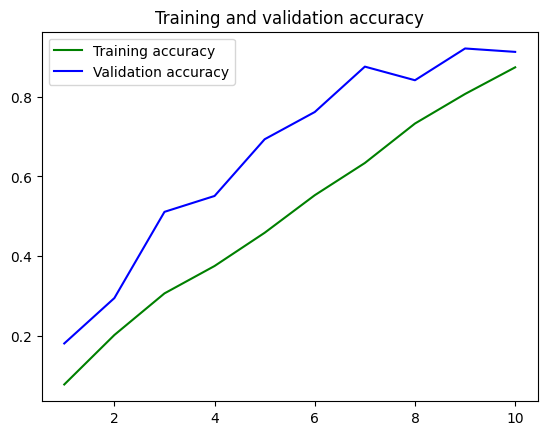

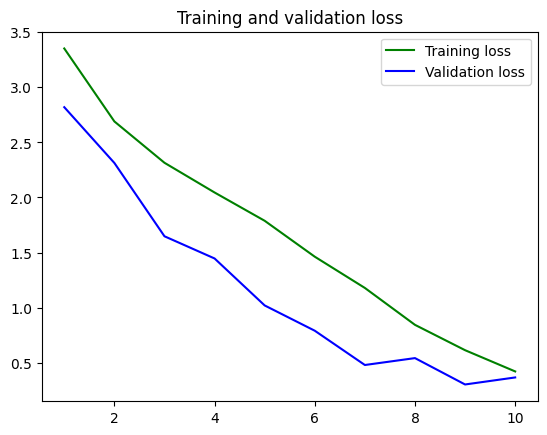

In [ ]:
import matplotlib.pyplot as plt
# Plot the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'g-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:

# Evaluate the model on test data
score = model.evaluate(validation_generator)
print("Test Accuracy:", score[1])


12/12 [==============================] - 21s 2s/step - loss: 0.3568 - accuracy: 0.9146
Test Accuracy: 0.9146005511283875


In [ ]:
# Load the saved model
loaded_model = load_model('my_model.h5')


In [ ]:
#test a single image
test_image_path = '/content/drive/MyDrive/ANN_Train_Data/CNN/train/test/ginger/Image_1.jpg'
img = load_img(test_image_path, target_size=(img_width, img_height))
plt.imshow(img)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.
prediction = loaded_model.predict(img_array)
class_index = np.argmax(prediction)
class_name = [k for k, v in train_generator.class_indices.items() if v == class_index][0]
print('Predicted class:', class_name)


NameError: name 'load_img' is not defined

In [ ]:
#Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img,

# Define image dimensions and file paths
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
train_dir = '/content/drive/MyDrive/ANN_Train_Data/CNN/train/train'
validation_dir = '/content/drive/MyDrive/ANN_Train_Data/CNN/train/validation'
test_dir = '/content/drive/MyDrive/ANN_Train_Data/CNN/train/test'
num_classes = 36
batch_size = 32

# Prepare data augmentation configuration for training data
train_datagen = ImageDataGenerator(rescale=1./255)

# Prepare data augmentation configuration for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Generate training data from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Generate validation data from directory
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size)

# Save the trained model
model.save('my_model.h5')
import matplotlib.pyplot as plt
# Plot the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'g-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate the model on test data
score = model.evaluate(validation_generator)
print("Test Accuracy:", score[1])
# Load the saved model
loaded_model = load_model('my_model.h5')
#test a single image
test_image_path = '/content/drive/MyDrive/ANN_Train_Data/CNN/train/test/apple/Image_1.jpg'
img = load_img(test_image_path, target_size=(img_width, img_height))
plt.imshow(img)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.
prediction = loaded_model.predict(img_array)
class_index = np.argmax(prediction)
class_name = [k for k, v in train_generator.class_indices.items() if v == class_index][0]
print('Predicted class:', class_name)
